# Dog Breed Identification
### <span style="color:red">USE PYTHON 3.7</span>
Jupyter notebook to document and display outputs for live code.
*Currently using test code from tensorflow's image classification* found:
[here](https://www.tensorflow.org/tutorials/images/classification)

Code written here imports required libraries for function

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
tf.__version__

'2.3.0'

placeholder

In [3]:
import pathlib
data_dir = os.getcwd() + "\\data\\dogImages"
data_dir = pathlib.Path(data_dir)
print(data_dir)


C:\Users\matth\source\repos\Xyniath\Dog-Breed-Identification\data\dogImages


In [4]:
image_count = len(list(data_dir.glob('*/*/*.jpg')))
print(image_count)

8351


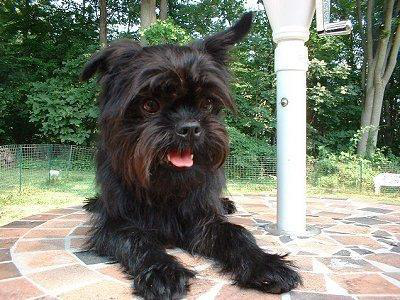

In [5]:
affenpinscher = list(data_dir.glob('train/001.affenpinscher/*'))
PIL.Image.open(str(affenpinscher[0]))

In [6]:
batch_size = 32
image_height = 180
image_width = 180

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
    validation_split=0.2,
    subset = "training",
    seed = 123,
    image_size = (image_height, image_width),
    batch_size = batch_size)

Found 8351 files belonging to 3 classes.
Using 6681 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split = 0.2,
  subset = "validation",
  seed = 123,
  image_size = (image_height, image_width),
  batch_size = batch_size)

Found 8351 files belonging to 3 classes.
Using 1670 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['test', 'train', 'valid']


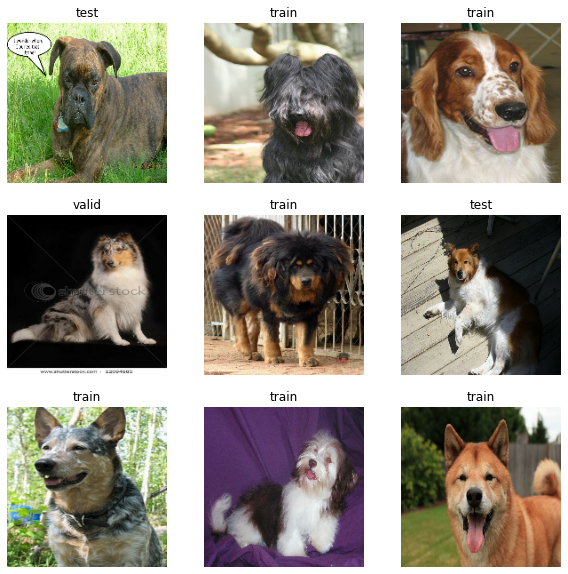

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [11]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
normalisation_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [14]:
normalised_ds = train_ds.map(lambda x, y: (normalisation_layer(x), y))
image_batch, labels_batch = next(iter(normalised_ds))
first_image = image_batch[0]
#Notice the pixels values are now in `[0,1,]`.
print(np.min(first_image), np.max(first_image))

InvalidArgumentError: Invalid JPEG data or crop window, data size 380942
	 [[{{node decode_image/cond_jpeg/then/_0/decode_image/cond_jpeg/DecodeJpeg}}]]

In [ ]:
num_classes = 120

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_height, image_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
